# <a href="https://thetahat.ru/courses/bm-2024-aut">Cтатистика ФБМФ</a>
## Свойства оценок

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

## Задача 1
### Распределение Стьюдента


В `scipy.stats` распределение Стьюдента задается объектом `t` с параметрами:
 * `loc` и `scale` параметры распределения так же как и у нормального распределение
 * `df` число степеней свободы

Все остальные методы стандартные. Например, генерации выборки из распределения $T_{50}$ будет выглядеть так:


In [11]:
sps.t(df=50).rvs(4)

array([-1.24487854, -0.70785652,  0.45137728, -1.39544005])

Постройте на одном графике плотности распределения Стьюдента и нормального.


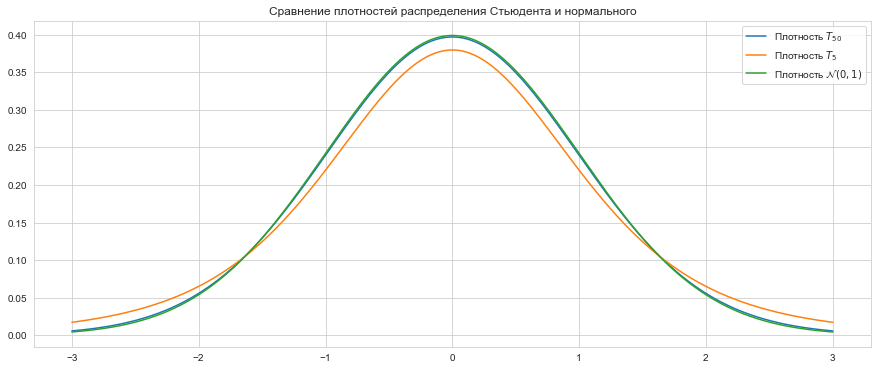

In [13]:
# сетка от -3 до 3 из 1000 значений
grid = np.linspace(-3, 3, 1000)

# считаем значения функций в выборке
norm_pdf_values = sps.norm.pdf(grid)
t_pdf_values = sps.t.pdf(grid, df = 50)

# отрисовка графика
plt.figure(figsize=(15, 6))
plt.plot(grid, t_pdf_values, label='Плотность $T_{50}$')
plt.plot(grid, sps.t.pdf(grid, df = 5), label='Плотность $T_{5}$')
plt.plot(grid, norm_pdf_values, label='Плотность $\\mathcal{N}(0,1)$')
plt.title('Сравнение плотностей распределения Стьюдента и нормального')
plt.legend()
plt.show()

Что вы можете сказать о скорости убывания "хвостов" данных распределений? Повлияет ли это на значения соответствующих квантилей?

**Ответ:** Я привела два примера распределений Стьюдента,так как для 50 степеней свободы график практически совпадает с графиком нормального распределения. Показателен пример с 5 степенями свободы - хвосты убывают медленнее, из-за этого значения для квантилей будет увеличиваться.

### Квантили распределения Стьюдента

Для подсчета теоретических значений квантилей в модуле `scipy.stats` есть метод `.ppf`. На вход принимает параметр `alpha` - значение квантиля, а так же все параметры выбранного распределения.



In [14]:
sps.norm(loc=0, scale=1).ppf(0.05)

-1.6448536269514729

Для распределения Стьюдента нужно указать еще число степеней свобод.

In [15]:
sps.t(loc=0, scale=1, df=5).ppf(0.05)

-2.0150483726691575

Как мы видим, значения квантилей довольно сильно различаются. 

Возьмите `alpha` равное 95% и постройте график значений квантилей распределения стьюдента $T_{n-1,(1+\alpha)/2}$ от его степеней свобод. Так же нанесите на график значение квантиля нормального распределения $z_{(1+\alpha)/2}$

*Указание*: рассмотрите значения степеней свобод от 1 до 50.

In [18]:
alpha = 0.95
dfs =  np.arange(1,51)
dfs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

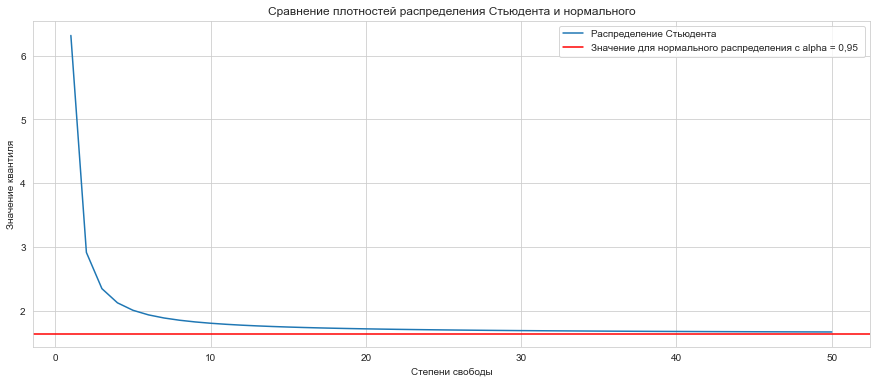

In [37]:
qantile_t = np.array(sps.t(loc=0, scale=1, df=dfs).ppf(0.95))

# отрисовка графика
plt.figure(figsize=(15, 6))
plt.plot(dfs, qantile_t, label='Распределение Стьюдента')
plt.axhline(y = sps.norm(loc=0, scale=1).ppf(0.95), label='Значение для нормального распределения с alpha = 0,95 ', color = 'red')
plt.title('Сравнение плотностей распределения Стьюдента и нормального')
plt.xlabel('Степени свободы')
plt.ylabel('Значение квантиля')
plt.legend()
plt.show()

Как изменяется поведение значения квантилей t распределения, есть ли у него какой-то предел?

**Ответ:**

Значение квантилей для распределения Стьюдента резко падает с увеличением степени свободы и стремится к значению для нормального распределения.

### ДИ в нормальной модели
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимптотический доверительный интервал при помощи центральной предельной теоремы;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.


Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал: ($\overline{X} - \frac{Z_{\frac{1+\alpha}{2}}}{\sqrt{n}}S$;$\overline{X} + \frac{Z_{\frac{1+\alpha}{2}}}{\sqrt{n}}S$)

Точный доверительный интервал: ($\overline{X} - \frac{T_{n-1\frac{1+\alpha}{2}}}{\sqrt{n-1}}S$;$\overline{X} + \frac{T_{n-1\frac{1+\alpha}{2}}}{\sqrt{n-1}}S$)



Постройте доверительные интервалы для параметра сдвига стандартного нормального распределения. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

*Указание*: рассмотрите длину выборки около 20-30.


In [99]:
sample_size = 30
sample = sps.norm(loc=0, scale=1).rvs(sample_size)  # выборка
alpha = 0.95
asymptotic_ci_left = np.mean(sample) - sps.norm.ppf((1+alpha)/2)/(sample_size**0.5)*np.std(sample) # асимптотические ДИ
asymptotic_ci_right = np.mean(sample) + sps.norm.ppf((1+alpha)/2)/(sample_size)**0.5*np.std(sample)

precise_ci_right = np.mean(sample) + sps.t(df = 29).ppf((1+alpha)/2)/(sample_size-1)**0.5*np.std(sample)
precise_ci_left = np.mean(sample) - sps.t(df = 29).ppf((1+alpha)/2)/(sample_size-1)**0.5*np.std(sample)


df = pd.DataFrame({"": ["Асимптотический доверительный интервал", "Точный доверительный интервал"],
                   "левая граница": [asymptotic_ci_left, precise_ci_left],
                   "правая граница": [ asymptotic_ci_right, precise_ci_right]})
df

,,левая граница,правая граница
0,Асимптотический доверительный интервал,-0.351813,0.459231
1,Точный доверительный интервал,-0.376689,0.484107


Сравните полученные значения для доверительных интервалов.


**Ответ**: 

Точный доверительный интервал, полученный через распределение Стьюдента шире, что видно из визуализации распределения (ветви понимаются вверх относительно нормального распределения)


Реализуйте функции построения этих интервалов по выборке. Функции уже задокументированы.

Интервалы считайте по префиксам. Циклы использовать **запрещено**. Для подсчета среднего по префиксам используйте функцию `np.cumsum`.

In [162]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    '''
    Функция для вычисления асимптотического доверительного интервала
        параметра сдвига для всех подвыборок выборки
    param sample: выборка,
    param alpha: уровень доверия

    return: асимптотический доверительный интервал
    '''
    sample_size = np.arange(1,len(sample)+1)
    
    return (np.cumsum(sample)/(sample_size) - sps.norm.ppf((1+alpha)/2)/(sample_size**0.5)*(np.cumsum(sample**2)/(sample_size)-np.cumsum(sample)/(sample_size)**2), np.cumsum(sample)/(sample_size) + sps.norm.ppf((1+alpha)/2)/(sample_size**0.5)*(np.cumsum(sample**2)/(sample_size)-np.cumsum(sample)/(sample_size)**2))


def calculate_confidence_intervals(sample, alpha=0.95):
    '''
    Функция для вычисления неасимптотического доверительного интервала
        параметра сдвига для всех подвыборок выборки
    param sample: выборка,
    param alpha: уровень доверия

    return: неасимптотический доверительный интервал
    '''
    sample_size = np.arange(1,len(sample)+1)
    answer = (np.cumsum(sample)/(sample_size) - sps.t(df = sample_size - 1).ppf((1+alpha)/2)/((sample_size-1)**0.5)*(np.cumsum(sample**2)/(sample_size)-np.cumsum(sample)/(sample_size)**2), np.cumsum(sample)/(sample_size) + sps.t(df = sample_size - 1).ppf((1+alpha)/2)/((sample_size-1)**0.5)*(np.cumsum(sample**2)/(sample_size)-np.cumsum(sample)/(sample_size)**2))
    return answer

Сгенерируйте выборку из нормального распределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассмотрите длину выборки около 20-30.

Чтобы не плодить код, допишите следующую функцию (см. ниже). При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".

*Подсказка:* вам может пригодиться функция `plt.fill_between`.


In [168]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None,
    ylim=(-10, 10), color_estimation='#FF3300', color_interval='#00CC66',
    color_sample='#0066FF', label_estimation='Оценка',
    sample_label='Семпл', interval_label=None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.

    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    '''

    time = np.arange(len(left)) + 1

    assert len(time) == len(right)
    plt.figure(figsize=(15, 6))
    plt.plot(np.arange(len(sample)), left, label = 'левая граница для асимптотического интервала')
    plt.plot(np.arange(len(sample)), right, label = 'правая граница для асимптотического интервала')

    plt.legend(fontsize=16)
    plt.ylim(ylim)
    plt.xlabel('Размер выборки')
    plt.title('Зависимость значений \
доверительного интервала от размера выборки')
    plt.grid()

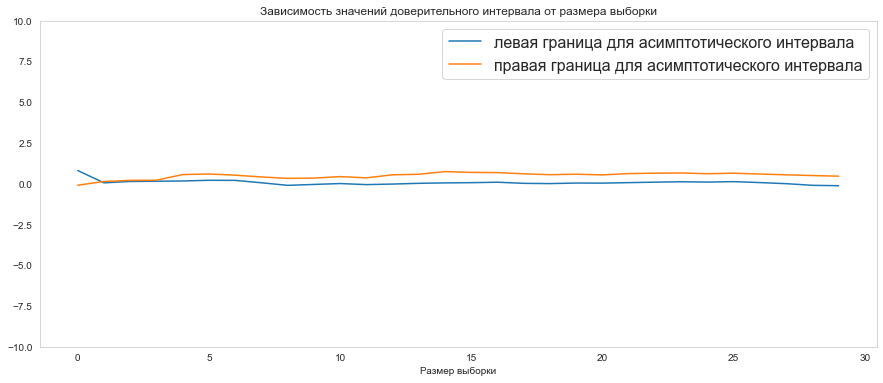

In [169]:
sample_size = 30
sample = sps.norm(loc=0, scale=1).rvs(sample_size)  # выборка

# не успела дописать, чтобы выводилось нормально и всё
left = calculate_asymptotic_confidence_intervals(sample, alpha=0.95)[0]
right = calculate_asymptotic_confidence_intervals(sample, alpha=0.95)[1]
draw_confidence_interval(left, right, estimation=None, sample = sample)

In [167]:
print(right)

[1.97694819 1.36082271 0.85425783 1.06276177 0.77246721 1.05747467
 1.03509886 0.87097529 0.7362576  1.35891033 1.17397108 1.0261803
 0.8889452  0.78529912 0.6870306  0.75833765 0.66744624 0.59381138
 0.52042081 0.53576934 0.50415562 0.51004559 0.47823378 0.520834
 0.48495585 0.51631052 0.51343612 0.54998023 0.50623129 0.50226851]


In [155]:

calculate_confidence_intervals(sample, alpha=0.95)[0]

array([         nan, -11.39220339,  -3.4300188 ,  -1.46763674,
        -0.88434501,  -0.61014764,  -0.47154625,  -0.92083596,
        -0.72210064,  -0.55966187,  -0.42543325,  -0.30936096,
        -0.45741619,  -0.51598387,  -0.44406553,  -0.46236372,
        -0.43986217,  -0.38311412,  -0.64467219,  -0.56477918,
        -0.49326077,  -0.54403532,  -0.48748385,  -0.53107269,
        -0.47890753,  -0.44602524,  -0.41870513,  -0.37944898,
        -0.44681689,  -0.39935265])

**Вывод:** 
В данной работе были рассмотрены: разница между распределением Стьюдента и нормальным, способы задания доверительных интервалов и понятие квартилей.
